# **ZOMATO EXPLORATORY ANALYSIS**

#### **Import Libararies**

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

#### **Load Data**

In [2]:
df = pd.read_csv("zomato.csv")

df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


#### **Basic Information**

In [3]:
df.shape

(51717, 17)

In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [7]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [9]:
df.nunique()

url                            51717
address                        11495
name                            8792
online_order                       2
book_table                         2
rate                              64
votes                           2328
phone                          14926
location                          93
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64

In [28]:
df.isnull().sum()

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

#### **Data Cleaning**

In [19]:
df['rate'] = df['rate'].astype(str).apply(lambda x: x.split('/')[0])

df['rate'] = df['rate'].replace(['NEW','-','nan'], np.nan)

df['rate'] = df['rate'].astype(float)

In [23]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '')
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')

#### **Handling Missing Values**

In [29]:
# Fill numeric columns with mean
df['votes'] = df['votes'].fillna(df['votes'].mean())
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].mean())

# Fill categorical columns with mode (most frequent value)
df['rate'] = df['rate'].fillna(df['rate'].mode()[0])
df['location'] = df['location'].fillna(df['location'].mode()[0])
df['rest_type'] = df['rest_type'].fillna(df['rest_type'].mode()[0])
df['cuisines'] = df['cuisines'].fillna(df['cuisines'].mode()[0])
df['dish_liked'] = df['dish_liked'].fillna('Not Available')
df['phone'] = df['phone'].fillna('Not Available')
df['reviews_list'] = df['reviews_list'].fillna('Not Available')
df['menu_item'] = df['menu_item'].fillna('Not Available')
df['listed_in(type)'] = df['listed_in(type)'].fillna(df['listed_in(type)'].mode()[0])
df['listed_in(city)'] = df['listed_in(city)'].fillna(df['listed_in(city)'].mode()[0])

print("\n✅ Missing values handled successfully!")
print(df.isnull().sum())


✅ Missing values handled successfully!
url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64


#### **Check for Duplicates**

In [30]:
duplicates = df.duplicated().sum()

print(f"\n Total Duplicate rows : {duplicates}")


 Total Duplicate rows : 0


## **Visual Analysis**

#### **Rating Distribution**

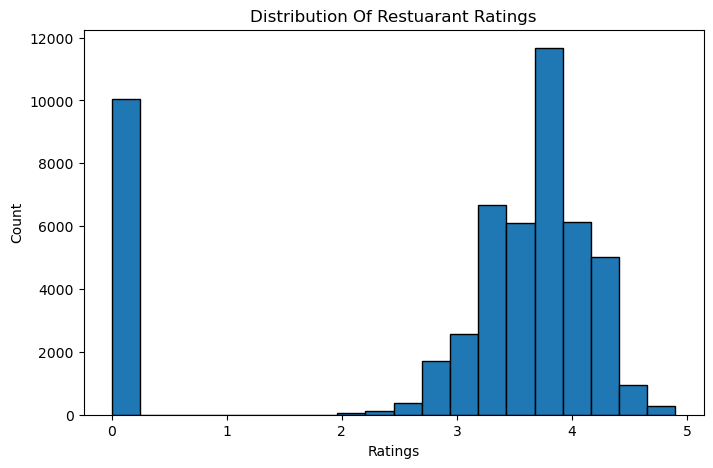

In [31]:
plt.figure(figsize =(8,5))

plt.hist(df['rate'].dropna(), bins=20 , edgecolor = 'black')

plt.title("Distribution Of Restuarant Ratings")

plt.xlabel("Ratings")

plt.ylabel("Count")

plt.show()

#### **Approx Cost Distribution**

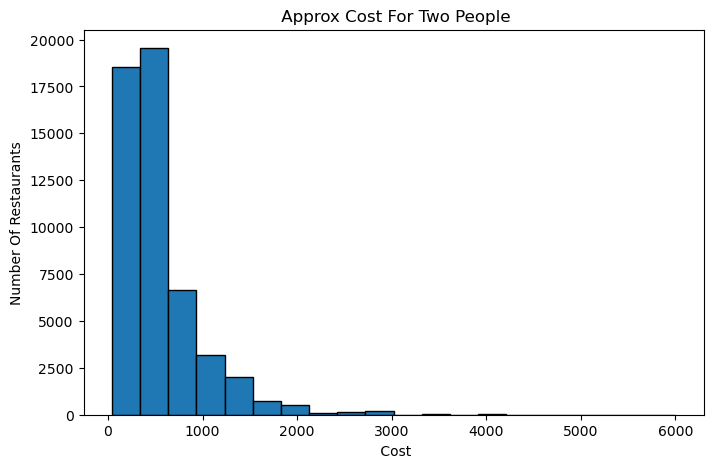

In [33]:
plt.figure(figsize=(8,5))

plt.hist(df['approx_cost(for two people)'].dropna() , bins = 20, edgecolor = 'black')

plt.title(" Approx Cost For Two People")

plt.xlabel(" Cost")

plt.ylabel("Number Of Restaurants")

plt.show()

#### **Online Order Availability**

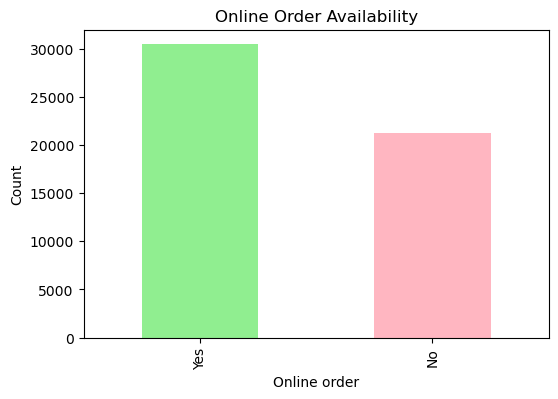

In [36]:
plt.figure(figsize=(6,4))

df['online_order'].value_counts().plot(kind = 'bar' , color = ['lightgreen' , 'lightpink'])

plt.title("Online Order Availability")

plt.xlabel("Online order")

plt.ylabel("Count")

plt.show()

#### **Book Table Availability**

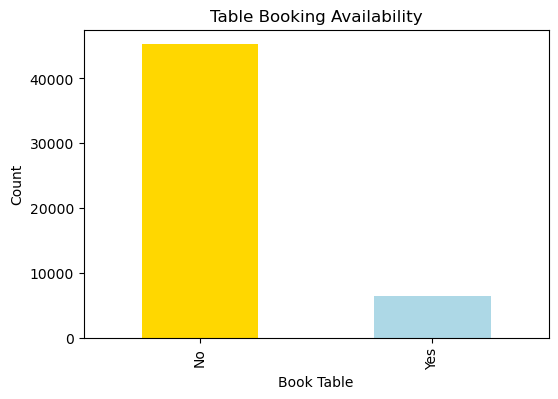

In [37]:
plt.figure(figsize =(6,4))

df['book_table'].value_counts().plot(kind = 'bar', color =['gold' , 'lightblue'])

plt.title("Table Booking Availability")

plt.xlabel("Book Table")

plt.ylabel("Count")

plt.show()

#### **Top 10 Locations With Most Restaurants**

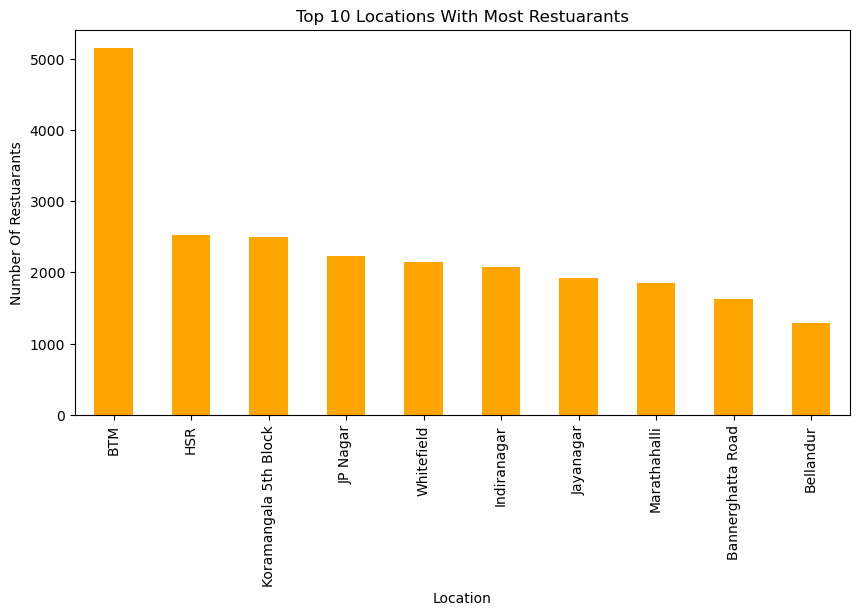

In [38]:
plt.figure(figsize =(10,5))

df['location'].value_counts().head(10).plot(kind = 'bar' , color = 'orange')

plt.title("Top 10 Locations With Most Restuarants")

plt.xlabel("Location")

plt.ylabel("Number Of Restuarants")

plt.show()

#### **Top 10 Restuarant Types**

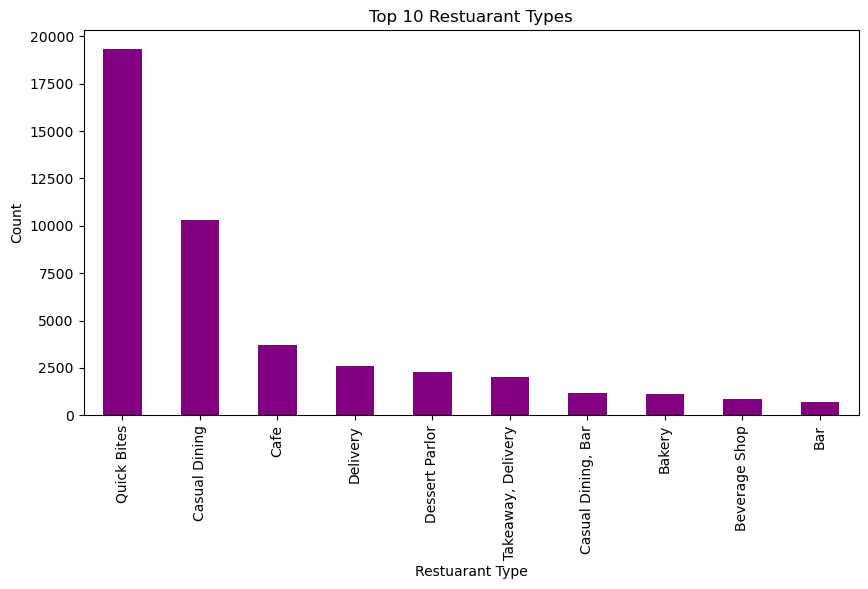

In [39]:
plt.figure(figsize = (10,5))

df['rest_type'].value_counts().head(10). plot(kind = 'bar' , color = 'purple')

plt.title("Top 10 Restuarant Types")

plt.xlabel("Restuarant Type")

plt.ylabel("Count")

plt.show()

#### **Cuisine Analysis**

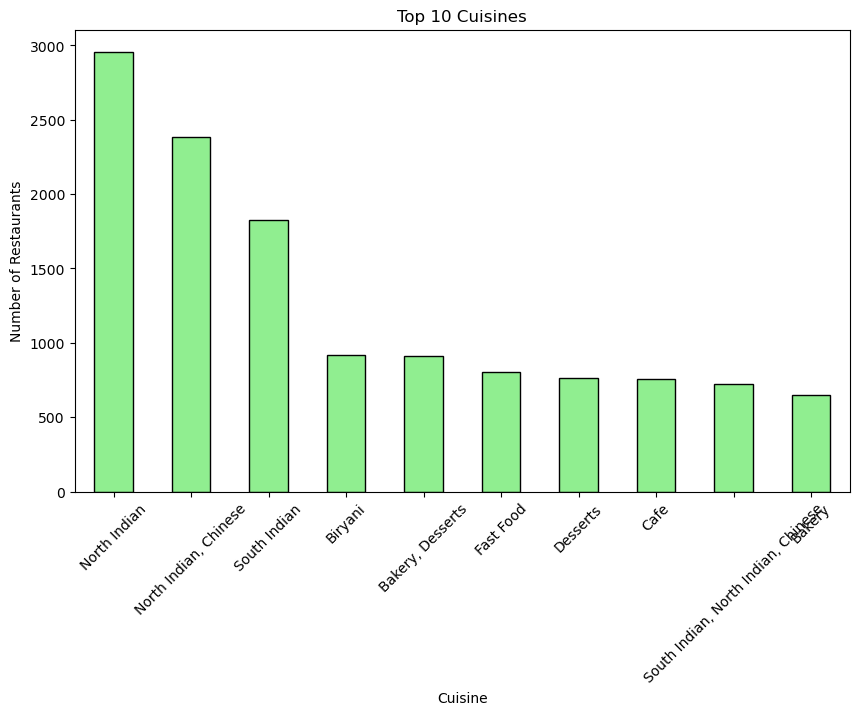

In [42]:
plt.figure(figsize=(10,6))

df['cuisines'].value_counts().head(10).plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title("Top 10 Cuisines")

plt.xlabel("Cuisine")

plt.ylabel("Number of Restaurants")

plt.xticks(rotation=45)

plt.show()

#### **Average Rating by Online Order**

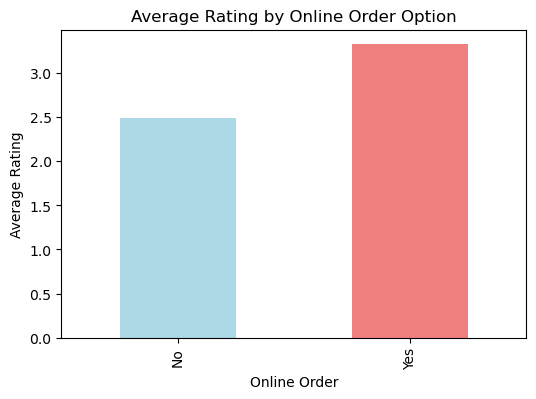

In [43]:
plt.figure(figsize=(6,4))

df.groupby('online_order')['rate'].mean().plot(kind='bar', color=['lightblue', 'lightcoral'])

plt.title('Average Rating by Online Order Option')

plt.xlabel('Online Order')

plt.ylabel('Average Rating')

plt.show()

#### **Average Rating Per City**


Average Rating per City:
 listed_in(city)
MG Road                  3.216289
Malleshwaram             3.210401
Brigade Road             3.188751
Church Street            3.175424
Residency Road           3.169691
Lavelle Road             3.157454
Old Airport Road         3.152702
Basavanagudi             3.139179
Indiranagar              3.131452
Banashankari             3.093163
Koramangala 4th Block    3.084059
Koramangala 6th Block    3.075944
Koramangala 7th Block    3.057386
Koramangala 5th Block    3.019076
Jayanagar                3.004597
Frazer Town              3.000084
Rajajinagar              2.975718
Sarjapur Road            2.961856
BTM                      2.950869
Bellandur                2.868378
JP Nagar                 2.855439
Kammanahalli             2.831452
HSR                      2.817634
Marathahalli             2.813502
New BEL Road             2.808784
Kalyan Nagar             2.803514
Whitefield               2.716296
Brookefield              2.698748
Banne

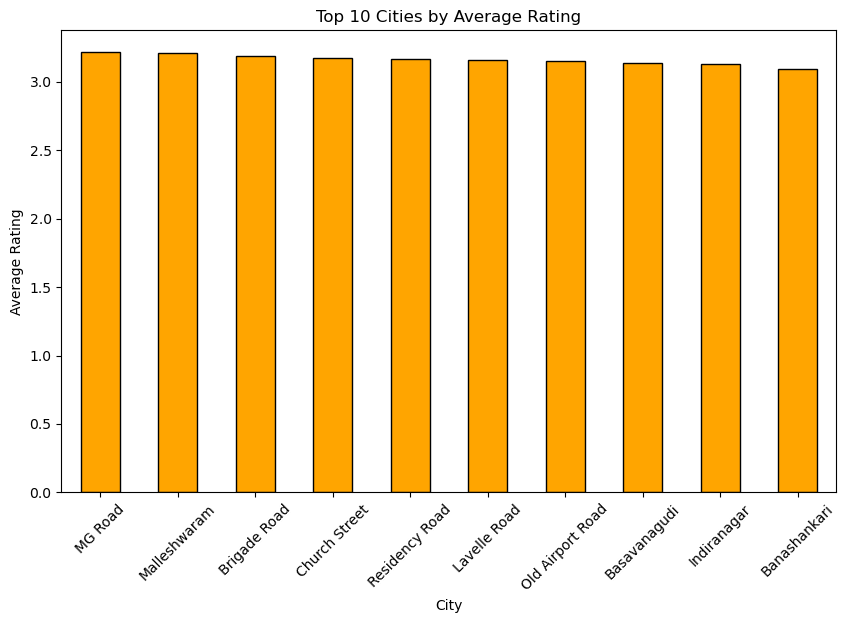

In [44]:
city_rating = df.groupby('listed_in(city)')['rate'].mean().sort_values(ascending=False)

print("\nAverage Rating per City:\n", city_rating)

plt.figure(figsize=(10,6))

city_rating.head(10).plot(kind='bar', color='orange', edgecolor='black')

plt.title("Top 10 Cities by Average Rating")

plt.xlabel("City")

plt.ylabel("Average Rating")

plt.xticks(rotation=45)

plt.show()

#### **Votes VS Rating**

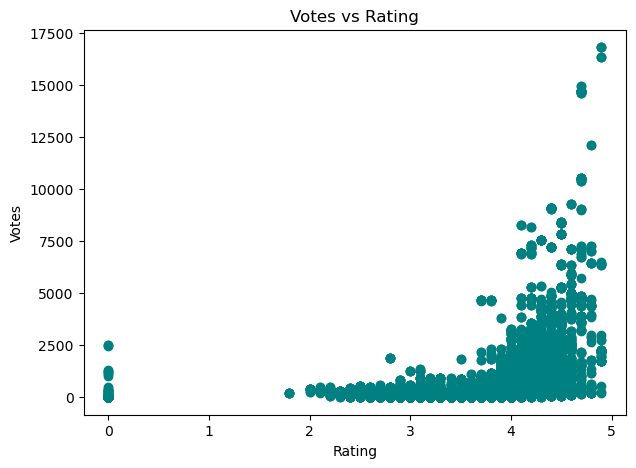

In [41]:
plt.figure(figsize=(7,5))

plt.scatter(df['rate'], df['votes'], color='teal')

plt.title('Votes vs Rating')

plt.xlabel('Rating')

plt.ylabel('Votes')

plt.show()

In [45]:
print("✅ EDA Summary Completed Successfully!\n")

total_restaurants = len(df)

avg_cost = round(df['approx_cost(for two people)'].mean(), 2)

avg_rating = df['rate'].value_counts().index[0]

most_common_cuisine = df['cuisines'].mode()[0]

most_popular_city = df['listed_in(city)'].mode()[0]

print(f"Total Restaurants Analyzed: {total_restaurants}")

print(f"Average Cost for Two: ₹{avg_cost}")

print(f"Most Common Rating: {avg_rating}")

print(f"Most Popular Cuisine: {most_common_cuisine}")

print(f"Top City with Most Restaurants: {most_popular_city}")


✅ EDA Summary Completed Successfully!

Total Restaurants Analyzed: 51717
Average Cost for Two: ₹555.43
Most Common Rating: 0.0
Most Popular Cuisine: North Indian
Top City with Most Restaurants: BTM
